----
## **Gri Search - SARIMAX**
----

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from itertools import product
from sklearn.metrics import mean_squared_error


In [4]:
df = pd.read_csv('dados_processados.csv', index_col='date', parse_dates=True)

features = ['clicks', 'impressions', 
            'eh_feriado', 'dia_semana_sin', 'dia_semana_cos', 
            'cpc', 'ctr']

y = df['spend']
X = df[features] 

In [5]:
p = d = q = range(0, 2)
P = D = Q = range(0, 2)
s = [7]  

pdq = list(product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], s[0]) for x in product(P, D, Q)]


In [6]:
import warnings
warnings.filterwarnings("ignore")

best_aic = np.inf
best_order = None
best_seasonal_order = None

for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            mod = sm.tsa.SARIMAX(
                y,
                exog=X,
                order=param,
                seasonal_order=seasonal_param,
                enforce_stationarity=False,
                enforce_invertibility=False
            )
            results = mod.fit(disp=False)
            
            if results.aic < best_aic:
                best_aic = results.aic
                best_order = param
                best_seasonal_order = seasonal_param

            print(f'ARIMA{param}x{seasonal_param}7 - AIC:{results.aic:.2f}')
        except:
            continue

print('Melhor combinação:')
print('Order:', best_order)
print('Seasonal Order:', best_seasonal_order)
print('AIC:', best_aic)


ARIMA(0, 0, 0)x(0, 0, 0, 7)7 - AIC:5478.52
ARIMA(0, 0, 0)x(0, 0, 1, 7)7 - AIC:3716.49
ARIMA(0, 0, 0)x(0, 1, 0, 7)7 - AIC:5447.25
ARIMA(0, 0, 0)x(0, 1, 1, 7)7 - AIC:3643.44
ARIMA(0, 0, 0)x(1, 0, 0, 7)7 - AIC:3720.08
ARIMA(0, 0, 0)x(1, 0, 1, 7)7 - AIC:3711.27
ARIMA(0, 0, 0)x(1, 1, 0, 7)7 - AIC:3684.14
ARIMA(0, 0, 0)x(1, 1, 1, 7)7 - AIC:3656.52
ARIMA(0, 0, 1)x(0, 0, 0, 7)7 - AIC:3655.23
ARIMA(0, 0, 1)x(0, 0, 1, 7)7 - AIC:3578.13
ARIMA(0, 0, 1)x(0, 1, 0, 7)7 - AIC:3710.03
ARIMA(0, 0, 1)x(0, 1, 1, 7)7 - AIC:3551.84
ARIMA(0, 0, 1)x(1, 0, 0, 7)7 - AIC:3596.68
ARIMA(0, 0, 1)x(1, 0, 1, 7)7 - AIC:3577.41
ARIMA(0, 0, 1)x(1, 1, 0, 7)7 - AIC:3604.01
ARIMA(0, 0, 1)x(1, 1, 1, 7)7 - AIC:3568.27
ARIMA(0, 1, 0)x(0, 0, 0, 7)7 - AIC:5215.25
ARIMA(0, 1, 0)x(0, 0, 1, 7)7 - AIC:3485.14
ARIMA(0, 1, 0)x(0, 1, 0, 7)7 - AIC:5318.33
ARIMA(0, 1, 0)x(0, 1, 1, 7)7 - AIC:3466.25
ARIMA(0, 1, 0)x(1, 0, 0, 7)7 - AIC:3493.82
ARIMA(0, 1, 0)x(1, 0, 1, 7)7 - AIC:3487.15
ARIMA(0, 1, 0)x(1, 1, 0, 7)7 - AIC:3556.03
ARIMA(0, 1,

### Testes com diferentes features

```
Melhor combinação:
Order: (0, 1, 1)
Seasonal Order: (0, 0, 1, 7)
AIC: 3477.6358896896745
```

```
Melhor combinação:
Order: (1, 0, 1)
Seasonal Order: (0, 0, 1, 7)
AIC: 3537.5273274943747
```

```
🏆 Melhor combinação:
Order: (0, 1, 0)
Seasonal Order: (1, 1, 3, 7)
AIC: 3374.5589498122676
```

In [7]:
# Modelo final com os melhores parâmetros
model = sm.tsa.SARIMAX(
    y,
    exog=X,
    order=best_order,
    seasonal_order=best_seasonal_order,
    enforce_stationarity=False,
    enforce_invertibility=False
)

results = model.fit()
print(results.summary())


                                     SARIMAX Results                                     
Dep. Variable:                             spend   No. Observations:                  346
Model:             SARIMAX(1, 1, 1)x(0, 0, 1, 7)   Log Likelihood               -1716.956
Date:                           Sat, 28 Jun 2025   AIC                           3455.911
Time:                                   12:18:58   BIC                           3497.900
Sample:                                        0   HQIC                          3472.649
                                           - 346                                         
Covariance Type:                             opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
clicks             0.2436      0.006     38.080      0.000       0.231       0.256
impressions        0.0008   3.5

----
## **Gri Search - XGBoost**
----

In [11]:
df = pd.read_csv('dados_processados.csv', index_col='date', parse_dates=True)

features = [
    'impressions', 'clicks', 'reach', 'cpc', 'ctr',
    'dia_semana_cos','dia_semana_sin', 'dia_do_mes', 
    'mes_cos', 'mes_sin', 'semana_do_ano',
    'spend_lag_1', 'spend_lag_7',
    'spend_media_movel_7d',
    'eh_feriado', 
]

y = df['spend']
X = df[features]  

In [10]:
!pip install -q xgboost

In [12]:

split_date = X.index[-14]

X_train = X[X.index < split_date]
y_train = y[X.index < split_date]

X_valid = X[X.index >= split_date]
y_valid = y[X.index >= split_date]


In [14]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Modelo base
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Parâmetros para testar
param_grid = {
    'n_estimators': [ 100, 200, 500, 1000],
    'max_depth': [2, 3, 4],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 1],
}

from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=3)

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=tscv,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Melhores hiperparâmetros:", grid_search.best_params_)
print("Melhor RMSE (negativo):", grid_search.best_score_)


Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] END learning_rate=0.01, max_depth=2, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=2, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=2, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=2, n_estimators=100, subsample=1; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=2, n_estimators=100, subsample=1; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=2, n_estimators=100, subsample=1; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=2, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=2, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=2, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=2, n_estimators=200, subsample=1; total time=   0.0s
[CV] E

### Testes com diferentes parâmetros

```
Melhores hiperparâmetros: {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 1000, 'subsample': 0.7}
Melhor RMSE (negativo): -60.31514982527961
```

```
Melhores hiperparâmetros: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200, 'subsample': 0.7}
Melhor RMSE (negativo): -63.07732239013345
```

Validação RMSE: 22.230551259614952


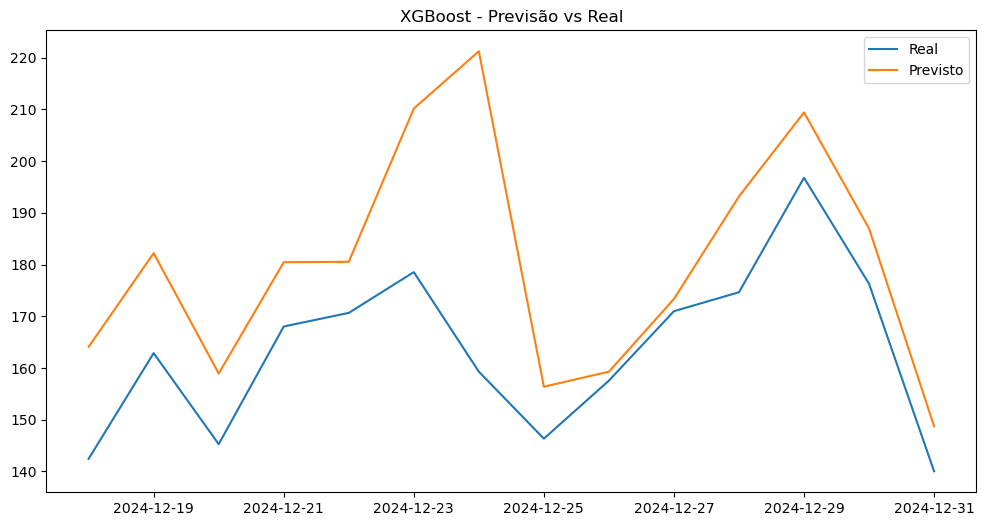

In [16]:
# Melhor modelo treinado
best_xgb = grid_search.best_estimator_

y_pred = best_xgb.predict(X_valid)

rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print("Validação RMSE:", rmse)

# Visualizar
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_valid.index, y_valid, label='Real')
plt.plot(y_valid.index, y_pred, label='Previsto')
plt.legend()
plt.title('XGBoost - Previsão vs Real')
plt.show()
